In [508]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

Import the dataset of the value of all manufacturers' shipment from https://fred.stlouisfed.org/series/UMTMVS.

In [509]:
df = pd.read_csv(r'C:\Users\Lenovo\Desktop\datasets\shipment.csv')
df.head()

,DATE,UMTMVS
0,1992-01-01,209438.0
1,1992-02-01,232679.0
2,1992-03-01,249673.0
3,1992-04-01,239666.0
4,1992-05-01,243231.0


In [510]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    364 non-null    object 
 1   UMTMVS  364 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


Convert the date column into datetime format and set it as the index

In [511]:
df.DATE = pd.to_datetime(df.DATE)

In [512]:
df.set_index('DATE', inplace=True)

In [513]:
df.index.dtype

dtype('<M8[ns]')

Plot the yearly moving average of UMTMVS

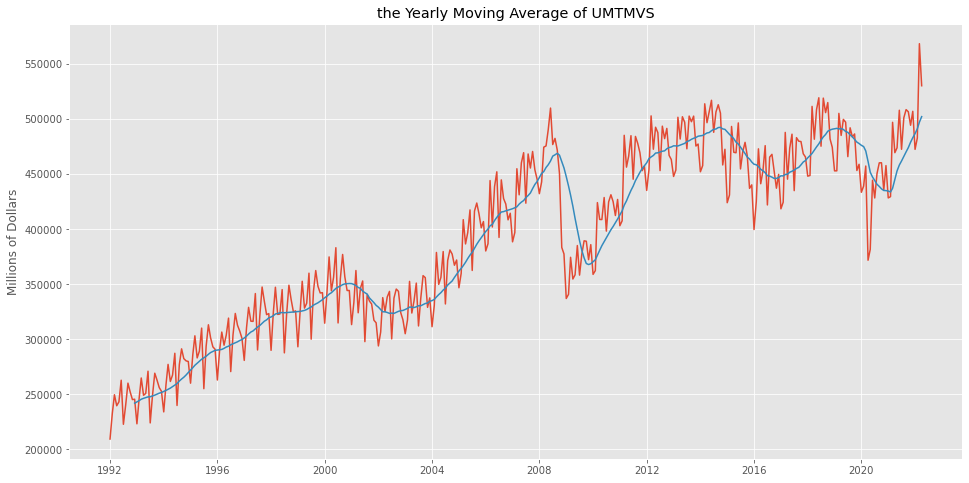

In [514]:
df_rolling = df.UMTMVS.rolling(window=12).mean()

plt.figure(figsize=(16, 8))
plt.style.use('ggplot')
plt.title('the Yearly Moving Average of UMTMVS')

ax = plt.gca()
ax.plot(df.index, df.UMTMVS)

plt.plot(df_rolling)
plt.ylabel('Millions of Dollars');

There is a manifest decline in 2008. Find what percentage did the value decrease from Jan 1 2008 to Jan 1 2009.

In [515]:
(df.loc['2009-01-01'] - df.loc['2008-01-01']) / df.loc['2008-01-01'] *100

UMTMVS   -22.022775
dtype: float64

How many millions of dollars have gone in 2008?

In [516]:
-(df.loc['2009-01-01'] - df.loc['2008-01-01'])

UMTMVS    95206.0
dtype: float64

How many months did it take to surprass the peak value in 2008?

In [517]:
# the peak month in 2008
max_2008 = df.loc['2008'].idxmax()
max_2008

UMTMVS   2008-06-01
dtype: datetime64[ns]

In [518]:
# the peak value in 2008
df.loc['2008'].max()

UMTMVS    510081.0
dtype: float64

In [519]:
# the first time the value has exceeded the peak value in 2008
post_peak = df.loc[df.index > '2008']
first_peak = post_peak[post_peak > df.loc['2008'].max()].dropna().index[0]
first_peak

Timestamp('2014-03-01 00:00:00')

In [520]:
# the number of months it took to reach that value
len(df.loc['2008-06-01':'2014-03-01'])

70

How much percentage increase has been observed in the last decade, i.e. from Jan 1 2012 to Jan 1 2022?

In [521]:
(df.loc['2022-01-01'] - df.loc['2012-01-01']) / df.loc['2012-01-01'] *100

UMTMVS    8.565672
dtype: float64

What is the month with the least value after 2005?

In [522]:
df[df.UMTMVS == min(df.UMTMVS[df.index > '2008'])]
# alternatively
df.loc['2005':].idxmin()

UMTMVS   2009-01-01
dtype: datetime64[ns]

Find the top 10 months when the value had the highest value

In [523]:
df.sort_values(by='UMTMVS', ascending=False).head(10)

,UMTMVS
DATE,
2022-03-01,568556.0
2022-04-01,530355.0
2018-06-01,519424.0
2018-08-01,519114.0
2014-06-01,517141.0
2018-10-01,515052.0
2014-03-01,513946.0
2014-09-01,513098.0
2018-03-01,511590.0


Plot the bar graph showing the yearly average value

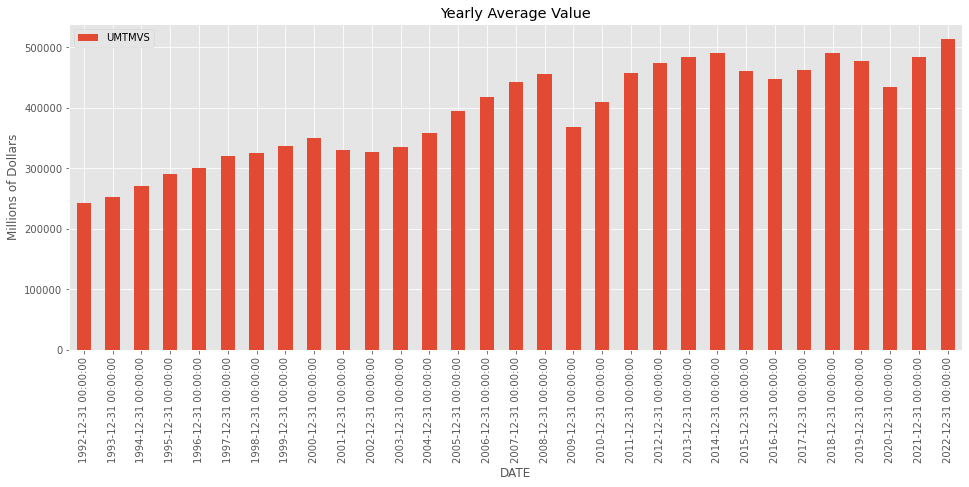

In [524]:
ax = df.resample('A').mean().plot.bar(figsize=(16,6), title='Yearly Average Value')
ax.set(ylabel='Millions of Dollars');

In which year did the yearly average value increased most?

In [525]:
year_avg = df.resample('Y').mean()
year_avg_shifted = yearly_avg.shift(1)
# calculate the value difference between each consecutive year 
change = year_avg_shifted - year_avg
change.UMTMVS.idxmax()

Timestamp('2009-12-31 00:00:00', freq='A-DEC')

## Additional Dataset: Monthly Milk Production

Import the monthly milk production dataset and perform some basic data cleaning steps. The dataset is from https://www.kaggle.com/datasets/pkmisra/monthly-milk-production-pounds.

In [526]:
df = pd.read_csv(r'C:\Users\Lenovo\Desktop\datasets\milk.csv')
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


Change the second column name to Milk Production per cow (pound) and set the month column as index in datetime type

In [527]:
df.rename(columns={'Monthly milk production: pounds per cow. Jan 62 ? Dec 75':'Production', 'Month': 'Date'},  inplace=True)

In [528]:
df.head()

,Date,Production
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [529]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        169 non-null    object 
 1   Production  168 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.8+ KB


Note that the month entry where the production is null does not have a date. To see this, show both the end rows and the rows that does not contain the substrings '19' or '20'.

In [530]:
df[~df.Date.str.contains('19|20')]

,Date,Production
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [531]:
df.tail(3)

,Date,Production
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [532]:
# drop every row having null values
df.dropna(inplace=True)

In [533]:
df.Date = pd.to_datetime(df.Date)
df.set_index('Date', inplace=True)
df.index

DatetimeIndex(['1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01',
               ...
               '1975-03-01', '1975-04-01', '1975-05-01', '1975-06-01',
               '1975-07-01', '1975-08-01', '1975-09-01', '1975-10-01',
               '1975-11-01', '1975-12-01'],
              dtype='datetime64[ns]', name='Date', length=168, freq=None)

Basic stats about the dataframe

In [534]:
df.describe()

,Production
count,168.000000
mean,754.708333
std,102.204524
min,553.000000
25%,677.750000
50%,761.000000
75%,824.500000
max,969.000000


What were the maximum and minimum amount of milk produced in a month and when were they produced?

In [535]:
max_milk = df.Production.max()
min_milk = df.Production.min()

max_date = df.index[df.Production.argmax()].date()
min_date = df.index[df.Production.argmin()].date()
print(f'''The maximum and minimum amount of milk that were produced in a month are {max_milk} and {min_milk} 
and they were produced in {max_date} and {min_date}, respectively. ''')

The maximum and minimum amount of milk that were produced in a month are 969.0 and 553.0 
and they were produced in 1974-05-01 and 1962-11-01, respectively. 


Plot the monthly milk production over the whole period

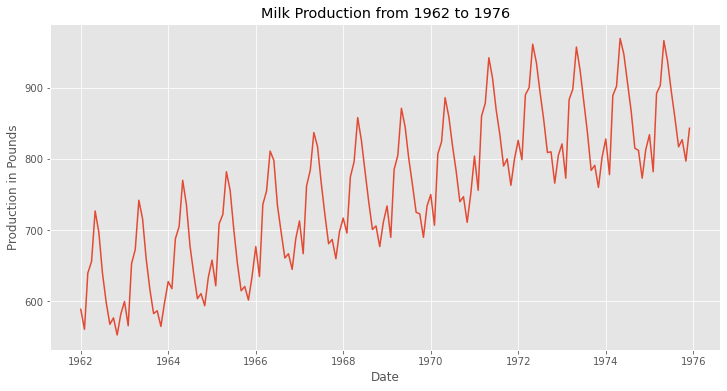

In [536]:
plt.figure(figsize=(12,6))
plt.title('Milk Production from 1962 to 1976')

plt.xlabel('Date')
plt.ylabel('Production in Pounds')

plt.plot(df);

Plot the yearly average milk production

[Text(0.5, 0, 'Years'), Text(0, 0.5, 'Pound')]

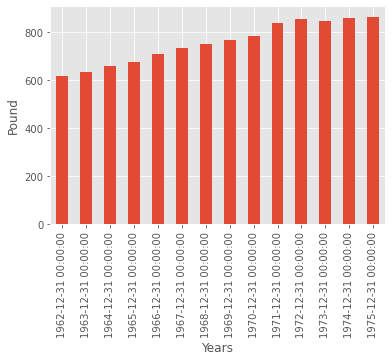

In [537]:
ax = df.Production.resample('Y').mean().plot.bar('Yearly Average Milk Production')
ax.set(xlabel='Years', ylabel='Pound')

In [538]:
df.index.dtype

dtype('<M8[ns]')

In [539]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [540]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

Add a new columns showing the month name

In [541]:
df['Month'] = df.index
df.Month = df.Month.dt.month_name()

In [542]:
# put the month name to the first column 
cols = df.columns.to_list()
new_col = cols[::-1]

df = df[new_col]
df.head()

,Month,Production
Date,,
1962-01-01,January,589.0
1962-02-01,February,561.0
1962-03-01,March,640.0
1962-04-01,April,656.0
1962-05-01,May,727.0


Display the monthly boxplot of production

<AxesSubplot:title={'center':'Production'}, xlabel='[Month]'>

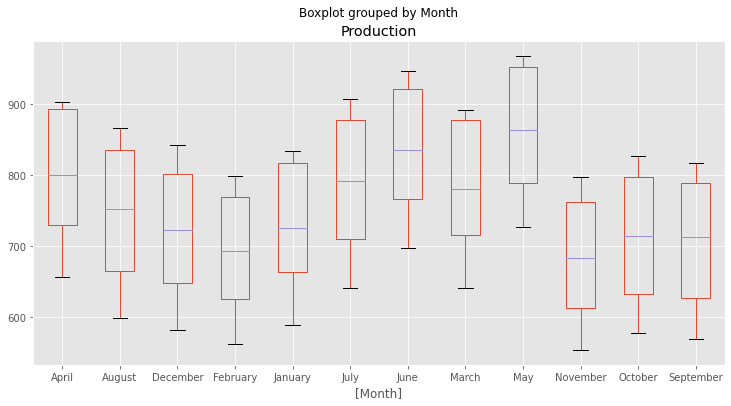

In [543]:
df.boxplot(by='Month', figsize=(12,6))